In [131]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [169]:
import numpy as np
import math

In [133]:
def handler(func, *args):
    return func(*args)

# Solving Lorenz96 model using 4th-order Runge-Kutta

In [134]:
class Lorenz96:
    def __init__(self, N, F):
        self.N = N
        self.F = F
    def gradient(self,t,x):
        d = np.zeros(self.N)
        d[0] = (x[1] - x[self.N-2]) * x[self.N-1] - x[0]
        d[1] = (x[2] - x[self.N-1]) * x[0]- x[1]
        d[self.N-1] = (x[0] - x[self.N-3]) * x[self.N-2] - x[self.N-1]
        for i in range(2, self.N-1):
            d[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i]
        return d + self.F

In [158]:
class RungeKutta4:
    def __init__(self, callback, N, dt, t, x):
        self.callback = callback
        self.N = N
        self.dt = dt
        self.t = t
        self.x = x
        
    def nextstep(self):
        k1 = handler(self.callback, self.t, self.x)
        k2 = handler(self.callback, self.t + self.dt/2, self.x + k1*self.dt/2)
        k3 = handler(self.callback, self.t + self.dt/2, self.x + k2*self.dt/2)
        k4 = handler(self.callback, self.t + self.dt  , self.x + k3*self.dt)
        self.t += self.dt
        self.x += (k1 + 2*k2 + 2*k3 + k4) * self.dt/6
        return self.x
    
    def orbit(self,T):
        steps = int(T/self.dt)
        o = np.zeros((steps,self.N))
        o[0] = self.x
        for i in range(steps):
            o[i] = self.nextstep()
        return o

In [136]:
def plot_orbit(dat):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(dat[:,0],dat[:,1],dat[:,2])
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.set_zlabel('$x_2$')
    plt.show()

<IPython.core.display.Javascript object>


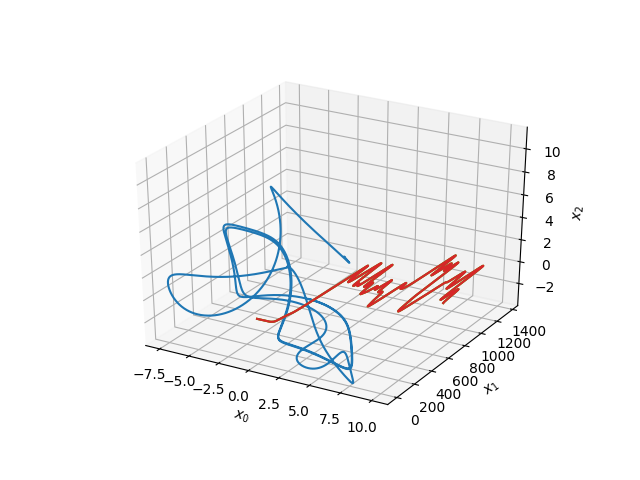

In [159]:
N = 4
F = 7
x0 = F * np.ones(N)
x0[3] += 0.01
lorenz = Lorenz96(N, F)
scheme = RungeKutta4(lorenz.gradient, N, 0.001, 0, x0)
o = scheme.orbit(10.)
plot_orbit(o)

## Validation using scipy odeint

In [138]:
from scipy.integrate import odeint

<IPython.core.display.Javascript object>


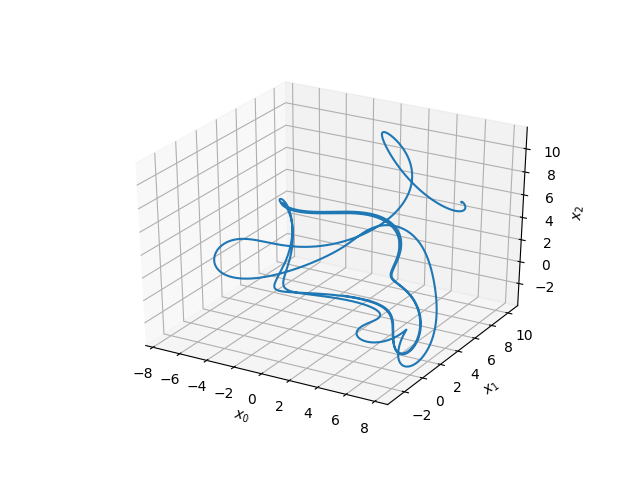

In [139]:
def lorenz96(x,t):
    # compute state derivatives
    d = np.zeros(N)
    # first the 3 edge cases: i=1,2,N
    d[0] = (x[1] - x[N-2]) * x[N-1] - x[0]
    d[1] = (x[2] - x[N-1]) * x[0]- x[1]
    d[N-1] = (x[0] - x[N-3]) * x[N-2] - x[N-1]
    # then the general case
    for i in range(2, N-1):
        d[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i]
    # add the forcing term
    d = d + F
    
    # return the state derivatives
    return d

# pdb.set_trace()
x0 = F*np.ones(N) # initial state (equilibrium)
x0[3] += 0.01 # add small perturbation to 20th variable
t = np.arange(0.0, 10.0, 0.001)

x = odeint(lorenz96, x0, t)

plot_orbit(x)

## Chaotic behabior when F=8

- Bounded
- Nonperiodic

<IPython.core.display.Javascript object>


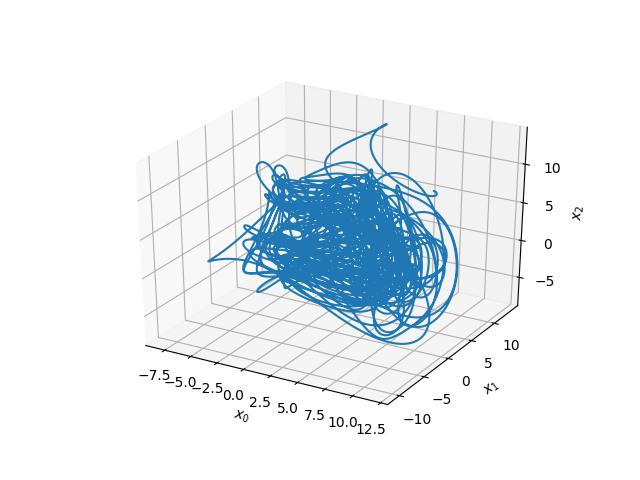

In [140]:
N = 36
F = 8
x0 = F * np.ones(N)
x0[19] += 0.01
lorenz = Lorenz96(N, F)
scheme = RungeKutta4(lorenz.gradient, N, 0.001, 0, x0)

o = scheme.orbit(100.)
plot_orbit(o)

- Sensitive to initial conditions (x0[19] = 1.0 -> 1.011)

<IPython.core.display.Javascript object>


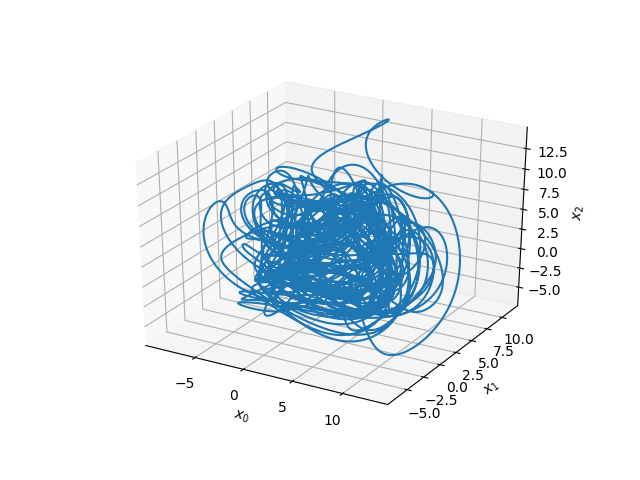

In [141]:
N = 36
F = 8
x0 = F * np.ones(N)
x0[19] += 0.011
lorenz = Lorenz96(N, F)
scheme = RungeKutta4(lorenz.gradient, N, 0.001, 0, x0)

o = scheme.orbit(100.)
plot_orbit(o)

<IPython.core.display.Javascript object>


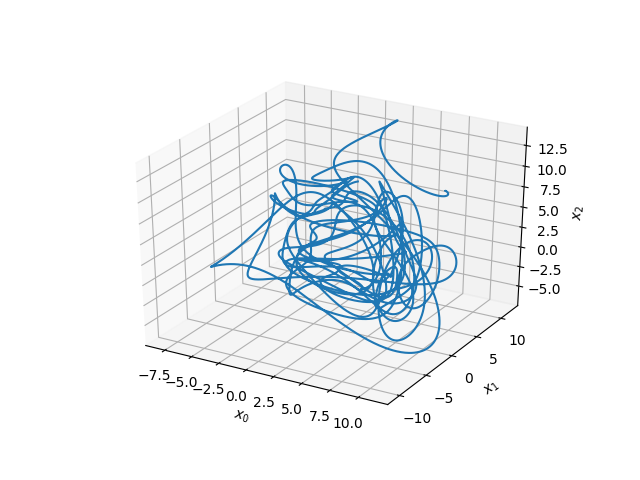

In [142]:
N = 36
F = 8
x0 = F * np.ones(N)
x0[19] += 0.01
lorenz = Lorenz96(N, F)
scheme = RungeKutta4(lorenz.gradient, N, 0.001, 0, x0)

o = scheme.orbit(30.)
plot_orbit(o)

<IPython.core.display.Javascript object>


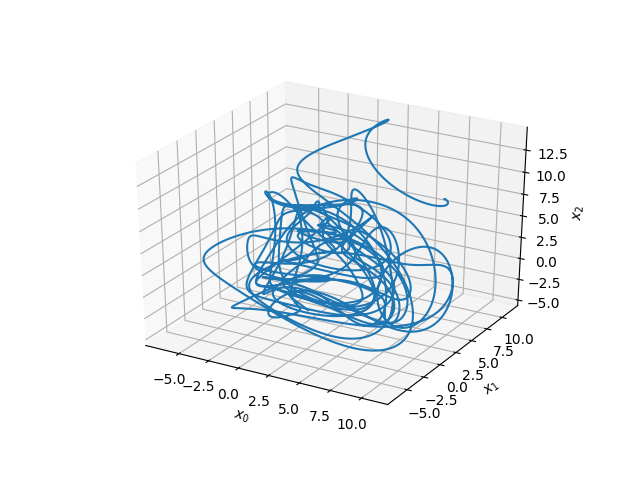

In [143]:
N = 36
F = 8
x0 = F * np.ones(N)
x0[19] += 0.011
lorenz = Lorenz96(N, F)
scheme = RungeKutta4(lorenz.gradient, N, 0.001, 0, x0)

o = scheme.orbit(30.)
plot_orbit(o)

- Non-chaotic when F=7

<IPython.core.display.Javascript object>


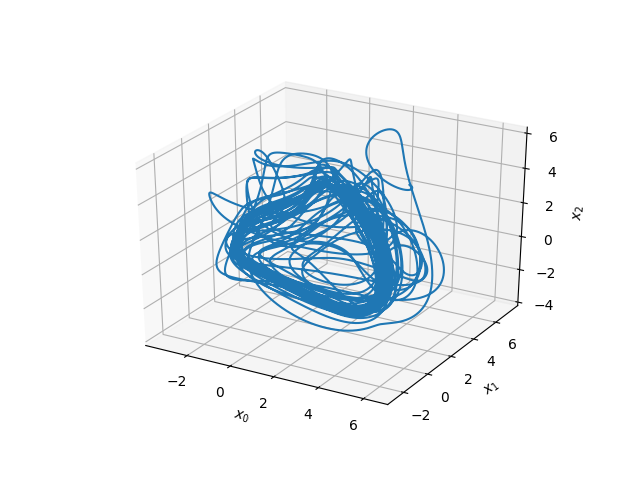

In [144]:
N = 36
F = 4
x0 = F * np.ones(N)
x0[19] += 0.01
lorenz = Lorenz96(N, F)
scheme = RungeKutta4(lorenz.gradient, N, 0.001, 0, x0)

o = scheme.orbit(100.)
plot_orbit(o)

<IPython.core.display.Javascript object>


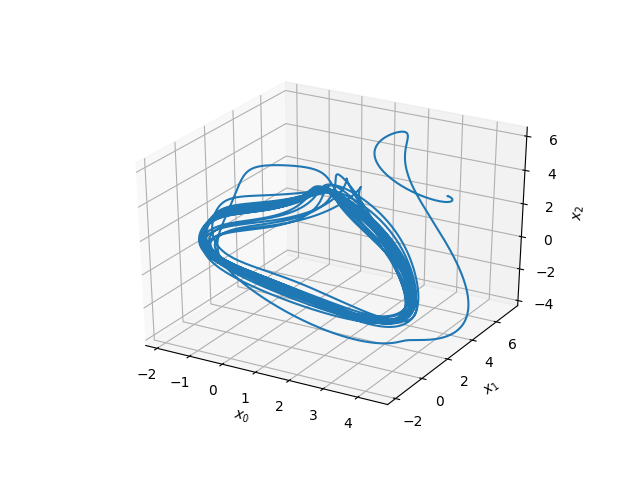

In [145]:
N = 36
F = 4
x0 = F * np.ones(N)
x0[19] += 0.011
lorenz = Lorenz96(N, F)
scheme = RungeKutta4(lorenz.gradient, N, 0.001, 0, x0)

o = scheme.orbit(100.)
plot_orbit(o)

## 誤差の平均発達率

In [170]:
N = 36
F = 8

lorenz = Lorenz96(N, F)

x0 = F * np.ones(N)
x0[19] += 0.01
scheme = RungeKutta4(lorenz.gradient, N, 0.001, 0, x0)
o1 = scheme.orbit(10.)

x0 = F * np.ones(N)
x0[19] += 0.011
scheme = RungeKutta4(lorenz.gradient, N, 0.001, 0, x0)
o2 = scheme.orbit(10.)

diff = o2 - o1
errors = [math.sqrt(np.inner(item, item)) for item in diff]

<IPython.core.display.Javascript object>


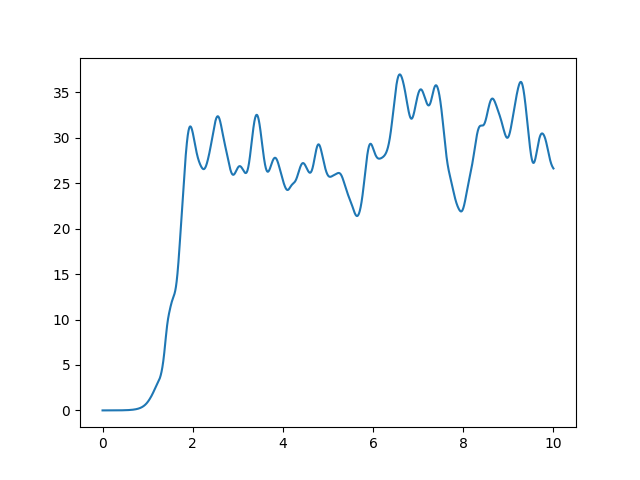

In [172]:
fig = plt.figure()
plt.plot(t,errors)
plt.show()